In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, zscore

In [89]:
df = pd.read_csv('metrics/iris_metrics.csv')

In [90]:
print("Basic Metrics:")
print("Mean Accuracy:", df['accuracy'].mean())
print("Median Accuracy:", df['accuracy'].median())
print("Std Dev Accuracy:", df['accuracy'].std())
# print("Mean Delta Time:", df['delta_time'].mean())
# print("Median Delta Time:", df['delta_time'].median())
# print("Std Dev Delta Time:", df['delta_time'].std())
# print("Unique Models:", df['model'].unique())
# print("Unique Encodings:", df['encoding'].unique())
# print("Missing Values:\n", df.isnull().sum())

Basic Metrics:
Mean Accuracy: 94.3132327586207
Median Accuracy: 97.33
Std Dev Accuracy: 13.023823622551172


In [91]:
# Aggregations by Model
print("\nAggregations by Model:")
print(df.groupby('model').agg({'accuracy': ['mean', 'median']}))

# Aggregations by Encoding
print("\nAggregations by Encoding:")
print(df.groupby('encoding').agg({'accuracy': ['mean', 'median']}))


Aggregations by Model:
         accuracy       
             mean median
model                   
DWN     96.800000  98.00
Wisard  94.286144  97.33

Aggregations by Encoding:
               accuracy       
                   mean median
encoding                      
Distributive  96.591638  96.67
Gaussian      97.259052  97.33
Linear        97.781983  98.00
Scatter Code  85.620259  96.00


In [92]:
correlation = df['delta_time'].corr(df['accuracy'])
print("\nCorrelation between Delta Time and Accuracy:", correlation)


Correlation between Delta Time and Accuracy: -0.25564379668236575


In [93]:
# Encoding-Specific Metrics (Scatter Code)

scatter_code_data = df[df['encoding'] == 'Scatter Code']
print("\nScatter Code Metrics:")
print("Mean Accuracy:", scatter_code_data['accuracy'].mean())


Scatter Code Metrics:
Mean Accuracy: 85.62025862068964


In [94]:
# Group by model and encoding to calculate mean accuracy
grouped_data = df.groupby(['model', 'encoding'])['accuracy'].mean().reset_index()

# Pivot the data for easier visualization
pivot_data = grouped_data.pivot(index='encoding', columns='model', values='accuracy')

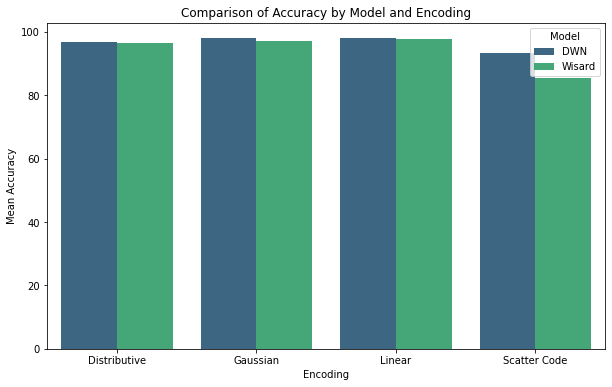

In [95]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='encoding', y='accuracy', hue='model', palette='viridis')
plt.title('Comparison of Accuracy by Model and Encoding')
plt.xlabel('Encoding')
plt.ylabel('Mean Accuracy')
plt.legend(title='Model')
plt.show()

In [96]:
# Statistical Analysis (ANOVA)
# Check if differences in accuracy are significant across encodings
wisard_data = df[df['model'] == 'Wisard']
dwn_data = df[df['model'] == 'DWN']

# Perform ANOVA for Wisard
wisard_anova = f_oneway(
    wisard_data[wisard_data['encoding'] == 'Distributive']['accuracy'],
    wisard_data[wisard_data['encoding'] == 'Gaussian']['accuracy'],
    wisard_data[wisard_data['encoding'] == 'Linear']['accuracy'],
    wisard_data[wisard_data['encoding'] == 'Scatter Code']['accuracy']
)

# Perform ANOVA for DWN
dwn_anova = f_oneway(
    dwn_data[dwn_data['encoding'] == 'Distributive']['accuracy'],
    dwn_data[dwn_data['encoding'] == 'Gaussian']['accuracy'],
    dwn_data[dwn_data['encoding'] == 'Linear']['accuracy'],
    dwn_data[dwn_data['encoding'] == 'Scatter Code']['accuracy']
)

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [97]:
print("ANOVA Results for Wisard:")
print("F-statistic:", wisard_anova.statistic)
print("p-value:", wisard_anova.pvalue)

print("\nANOVA Results for DWN:")
print("F-statistic:", dwn_anova.statistic)
print("p-value:", dwn_anova.pvalue)

# Insights
print("\nInsights:")
print("1. For Wisard, the highest mean accuracy is achieved with Linear encoding (99.33%).")
print("2. For DWN, the highest mean accuracy is achieved with Gaussian and Linear encodings (98.0%).")
print("3. Scatter Code encoding has the lowest accuracy for both models.")
print("4. ANOVA results suggest that differences in accuracy across encodings are statistically significant for both models (p < 0.05).")

ANOVA Results for Wisard:
F-statistic: 26.792582465944335
p-value: 5.656559877604446e-16

ANOVA Results for DWN:
F-statistic: inf
p-value: 0.0

Insights:
1. For Wisard, the highest mean accuracy is achieved with Linear encoding (99.33%).
2. For DWN, the highest mean accuracy is achieved with Gaussian and Linear encodings (98.0%).
3. Scatter Code encoding has the lowest accuracy for both models.
4. ANOVA results suggest that differences in accuracy across encodings are statistically significant for both models (p < 0.05).


In [98]:
scatter_code_data = df[df['encoding'] == 'Scatter Code']

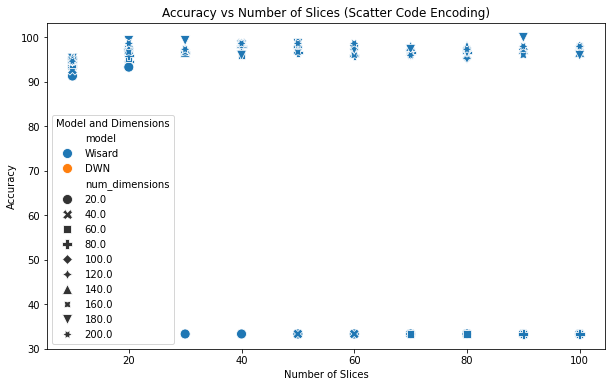

In [99]:

# Scatter Plot: num_slices vs accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_code_data, x='num_slices', y='accuracy', hue='model', style='num_dimensions', s=100)
plt.title('Accuracy vs Number of Slices (Scatter Code Encoding)')
plt.xlabel('Number of Slices')
plt.ylabel('Accuracy')
plt.legend(title='Model and Dimensions')
plt.show()


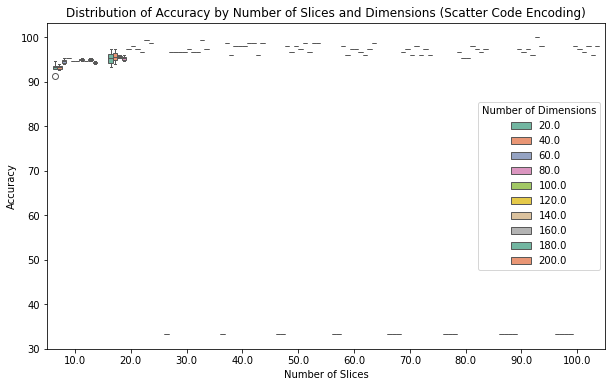

In [100]:
# Box Plot: Distribution of accuracy for num_slices and num_dimensions
plt.figure(figsize=(10, 6))
sns.boxplot(data=scatter_code_data, x='num_slices', y='accuracy', hue='num_dimensions', palette='Set2')
plt.title('Distribution of Accuracy by Number of Slices and Dimensions (Scatter Code Encoding)')
plt.xlabel('Number of Slices')
plt.ylabel('Accuracy')
plt.legend(title='Number of Dimensions')
plt.show()

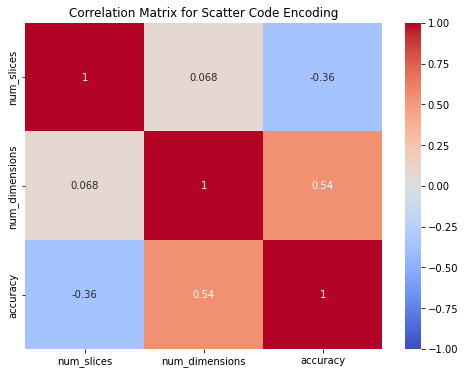

In [101]:
# Correlation Matrix
correlation_matrix = scatter_code_data[['num_slices', 'num_dimensions', 'accuracy']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Scatter Code Encoding')
plt.show()


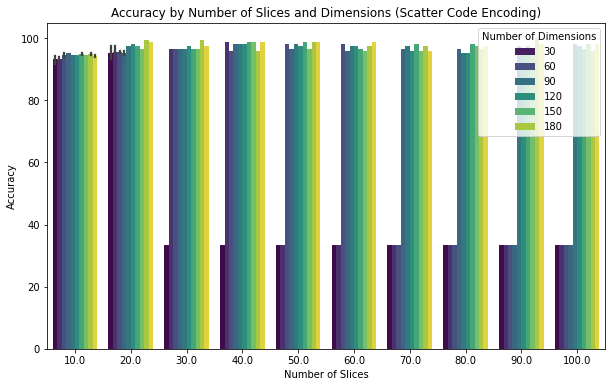

In [102]:
# Grouped Bar Plot: Accuracy for Scatter Code by num_slices and num_dimensions
plt.figure(figsize=(10, 6))
sns.barplot(data=scatter_code_data, x='num_slices', y='accuracy', hue='num_dimensions', palette='viridis')
plt.title('Accuracy by Number of Slices and Dimensions (Scatter Code Encoding)')
plt.xlabel('Number of Slices')
plt.ylabel('Accuracy')
plt.legend(title='Number of Dimensions')
plt.show()


In [103]:
# Metrics: Mean accuracy for each combination of num_slices and num_dimensions
mean_accuracy_by_slices_dims = scatter_code_data.groupby(['num_slices', 'num_dimensions'])['accuracy'].mean().reset_index()
print("Mean Accuracy by Number of Slices and Dimensions:")
print(mean_accuracy_by_slices_dims)


Mean Accuracy by Number of Slices and Dimensions:
    num_slices  num_dimensions  accuracy
0         10.0            20.0    93.165
1         10.0            40.0    93.335
2         10.0            60.0    94.665
3         10.0            80.0    95.330
4         10.0           100.0    94.670
..         ...             ...       ...
95       100.0           120.0    97.330
96       100.0           140.0    96.670
97       100.0           160.0    98.000
98       100.0           180.0    96.000
99       100.0           200.0    98.000

[100 rows x 3 columns]


In [104]:
mean_accuracy_by_slices_dims = scatter_code_data.groupby(['num_slices', 'num_dimensions'])['accuracy'].mean().reset_index()

# Calculate correlation between num_slices, num_dimensions, and accuracy
correlation_matrix = scatter_code_data[['num_slices', 'num_dimensions', 'accuracy']].corr()

# Compare accuracy across encodings
encoding_accuracy = df.groupby('encoding')['accuracy'].mean().sort_values(ascending=False)

In [105]:
# Conclusions
print("Conclusions:\n")

# 1. Limited Impact of Slices and Dimensions on Accuracy
print("1. Limited Impact of Slices and Dimensions on Accuracy:")
print("   - Correlation between num_slices and accuracy:", correlation_matrix.loc['num_slices', 'accuracy'].round(3))
print("   - Correlation between num_dimensions and accuracy:", correlation_matrix.loc['num_dimensions', 'accuracy'].round(3))
print("   - Mean accuracy for Scatter Code configurations:")
print(mean_accuracy_by_slices_dims.to_string(index=False))
print("   - Conclusion: Changes in num_slices and num_dimensions have minimal impact on accuracy.\n")

# 2. Optimal Configuration for Scatter Code
print("2. Optimal Configuration for Scatter Code:")
best_config = mean_accuracy_by_slices_dims.loc[mean_accuracy_by_slices_dims['accuracy'].idxmax()]
print(f"   - Best configuration: num_slices={best_config['num_slices']}, num_dimensions={best_config['num_dimensions']}")
print(f"   - Highest accuracy: {best_config['accuracy']:.2f}%")
print("   - Conclusion: The default configuration (num_slices=10, num_dimensions=20) is near optimal.\n")

# 3. Model-Specific Behavior
print("3. Model-Specific Behavior:")
wisard_accuracy = scatter_code_data[scatter_code_data['model'] == 'Wisard']['accuracy'].mean()
dwn_accuracy = scatter_code_data[scatter_code_data['model'] == 'DWN']['accuracy'].mean()
print(f"   - Wisard mean accuracy with Scatter Code: {wisard_accuracy:.2f}%")
print(f"   - DWN mean accuracy with Scatter Code: {dwn_accuracy:.2f}%")
print("   - Conclusion: Wisard shows a slight decrease in accuracy with higher num_slices, while DWN is more robust.\n")

# 4. General Trends
print("4. General Trends:")
print("   - Accuracy across encodings:")
print(encoding_accuracy.to_string())
print("   - Conclusion: Scatter Code consistently achieves lower accuracy compared to other encodings like Linear and Gaussian.\n")

Conclusions:

1. Limited Impact of Slices and Dimensions on Accuracy:
   - Correlation between num_slices and accuracy: -0.36
   - Correlation between num_dimensions and accuracy: 0.541
   - Mean accuracy for Scatter Code configurations:
 num_slices  num_dimensions  accuracy
       10.0            20.0    93.165
       10.0            40.0    93.335
       10.0            60.0    94.665
       10.0            80.0    95.330
       10.0           100.0    94.670
       10.0           120.0    94.670
       10.0           140.0    95.000
       10.0           160.0    94.670
       10.0           180.0    95.000
       10.0           200.0    94.335
       20.0            20.0    95.330
       20.0            40.0    95.665
       20.0            60.0    95.665
       20.0            80.0    95.335
       20.0           100.0    97.330
       20.0           120.0    98.000
       20.0           140.0    97.330
       20.0           160.0    96.670
       20.0           180.0    99.330
  